In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
ds = pd.read_csv('titanic.csv')

In [6]:
#Normilisation
NorData = (ds - np.min(ds,axis = 0))/(np.max(ds,axis = 0) - np.min(ds,axis = 0))

In [7]:
#Create Training data set and testing data set
x_train = NorData.iloc[:620,:5]
y_train = NorData.iloc[:620,5:]
x_test = NorData.iloc[620:,:5]
y_test = NorData.iloc[620:,5:]

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
train_pred = clf.predict(x_train)
train_accuracy = metrics.accuracy_score(y_train,train_pred)
print('Train Accuracy= ',train_accuracy)
test_pred = clf.predict(x_test)
test_accuracy = metrics.accuracy_score(y_test,test_pred)
print('Test Accuracy= ',test_accuracy)


Train Accuracy=  0.8564516129032258
Test Accuracy=  0.8277153558052435


In [9]:
from sklearn.metrics import roc_curve, auc
train_results = []
test_results = []
for k in range(2,20):
    clf = DecisionTreeClassifier(min_samples_leaf=k)
    clf.fit(x_train,y_train)
    train_pred = clf.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = clf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
optimal_leaf = np.argmax(test_results)+2
optimal_leaf

12

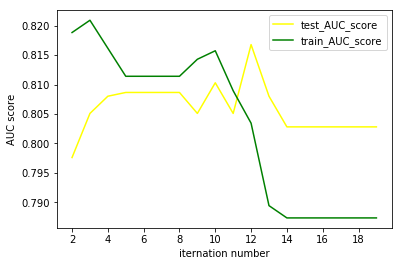

In [10]:
plt.plot(range(2,20),test_results,label='test_AUC_score',color='yellow')
plt.plot(range(2,20),train_results,label='train_AUC_score',color='green')
plt.xlabel('iternation number')
plt.ylabel('AUC score')
plt.xticks(np.arange(2, 20,step = 2))
plt.legend()

In [9]:
#P(S= true | G=female,C=1)
p1_a = 0
p1_b = 0

for index, rows in ds.iterrows():
    if rows['Sex'] == 1 and rows['Pclass'] == 1:
        p1_b += 1
        if rows['Survived'] == 1:
            p1_a += 1

p = float(p1_a)/p1_b
p

0.36885245901639346